# Application of Wavelet based K-means Algorithm in Mammogram Segmentation


In [30]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import pywt
from sklearn.cluster import KMeans

from MammogramSegmentation import MammogramSegmentation

Loading and resizing the image

In [31]:
img = cv.imread('mdb072.pgm', cv.IMREAD_GRAYSCALE)
img = img[200:, 270:800]

Discrete Wavelet Transform

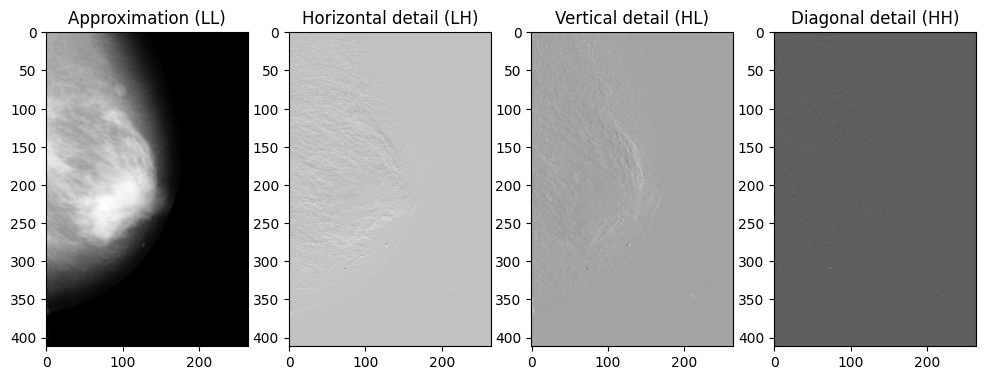

In [32]:
coeffs2 = pywt.dwt2(img, "haar")

LL, (LH, HL, HH) = coeffs2

fig, ax = plt.subplots(1, 4, figsize=(12, 12))
ax = ax.ravel()
ax[0].imshow(LL, cmap="gray")
ax[0].set_title("Approximation (LL)")
ax[1].imshow(LH, cmap="gray")
ax[1].set_title("Horizontal detail (LH)")
ax[2].imshow(HL, cmap="gray")
ax[2].set_title("Vertical detail (HL)")
ax[3].imshow(HH, cmap="gray")
ax[3].set_title("Diagonal detail (HH)")
plt.show()

Inverse Discrete Wavelet Transform

In [33]:
LL_zeroed = np.zeros(LL.shape)
coeffs2_modified = LL_zeroed, (LH, HL, HH)

high_pass_image = pywt.idwt2(coeffs2_modified, "haar")

img = img.astype(np.float32)

High Pass Filter

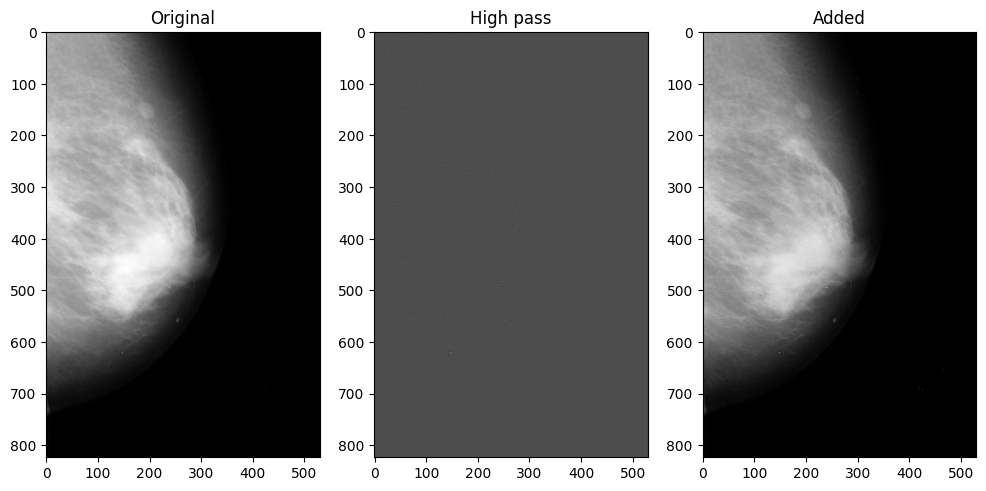

In [34]:
added = img + high_pass_image * 1.5

added = np.clip(added, 0, 255)
added = added.astype(np.uint8)

fig, ax = plt.subplots(1, 3, figsize=(12, 12))
ax[0].imshow(img, cmap="gray")
ax[0].set_title("Original")
ax[1].imshow(high_pass_image, cmap="gray")
ax[1].set_title("High pass")

ax[2].imshow(added, cmap="gray")
ax[2].set_title("Added")

plt.show()

K-means Clustering

C:\Users\ARGHYA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


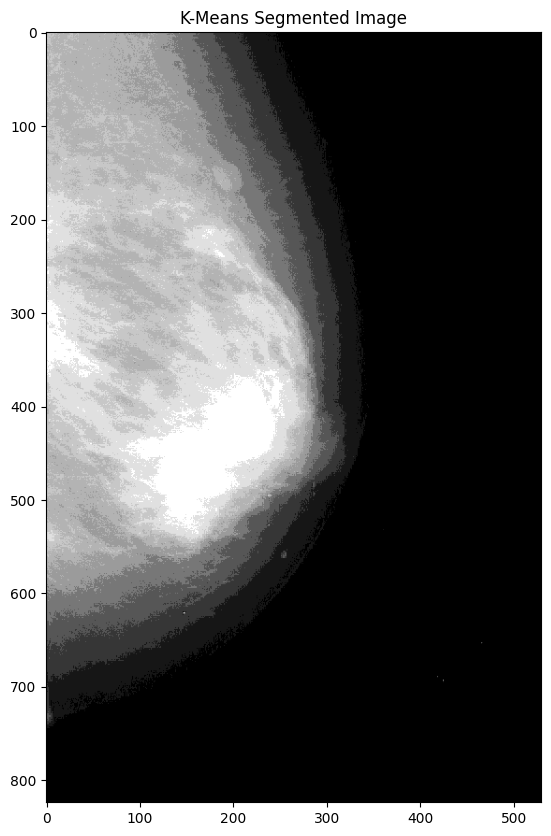

In [ ]:
k = 10
kmeans = KMeans(n_clusters=k, random_state = 42)
kmeans.fit(added.reshape(-1, 1))
labels = kmeans.labels_
centers = kmeans.cluster_centers_
segmented_image = centers[labels.flatten()].reshape(added.shape).astype(np.uint8)

plt.figure(figsize=(10,10))
plt.imshow(segmented_image, cmap="gray")
plt.title("K-Means Segmented Image")
plt.show()

Thresholding

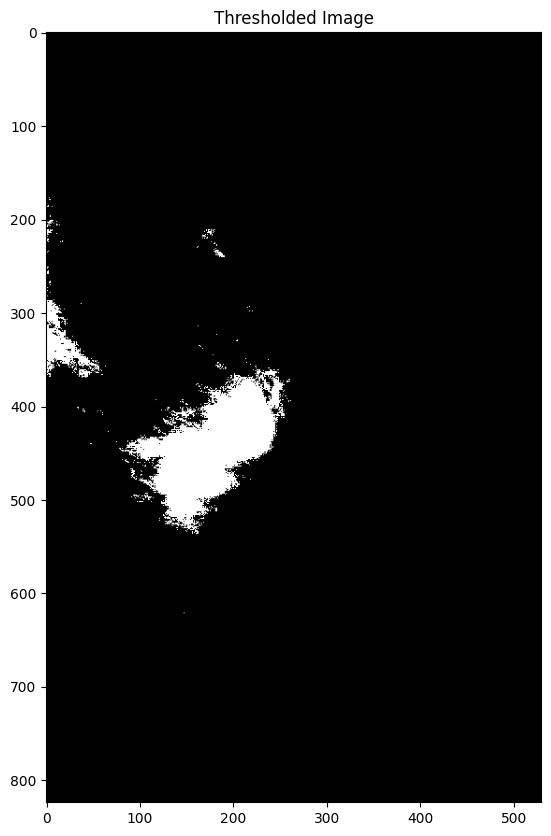

In [ ]:
_, thresholded = cv.threshold(segmented_image, 190, 255, cv.THRESH_BINARY)

plt.figure(figsize=(10, 10))
plt.imshow(thresholded, cmap="gray")
plt.title("Thresholded Image")
plt.show()

Final Result

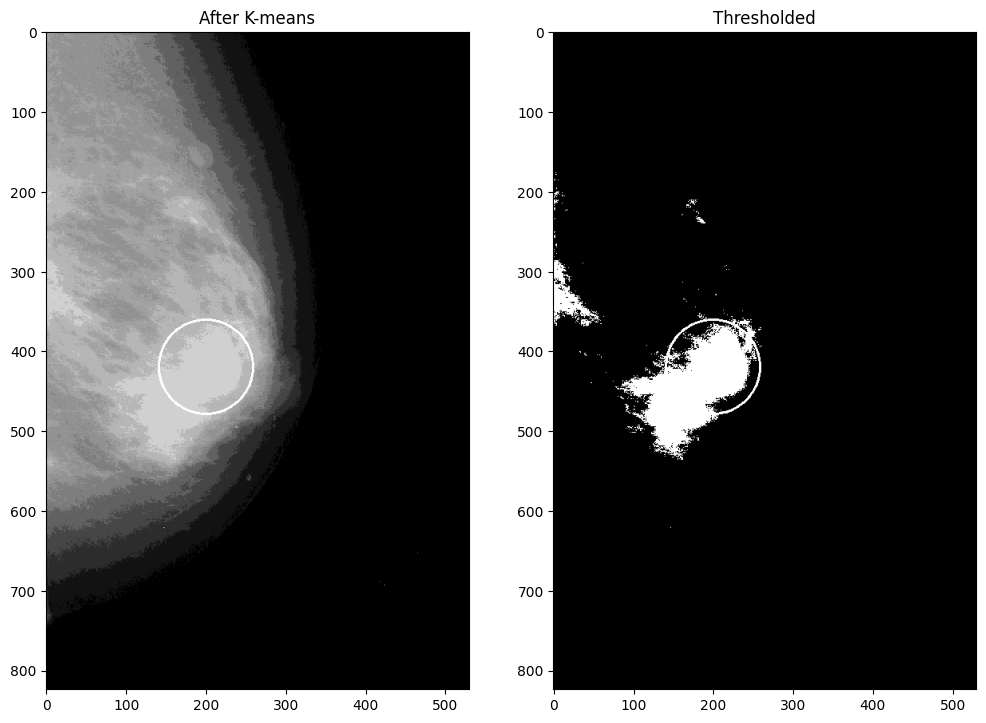

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(12, 12))


x = 266 - 270
y = 1024 - 517 - 200
r = 28


x = 200
y = 420
r = 59
cv.circle(segmented_image, (x, y), r, (255, 255, 255), 2)
cv.circle(thresholded, (x, y), r, (255, 255, 255), 2)


axs[0].imshow(segmented_image, cmap="gray")
axs[0].set_title("After K-means")
axs[1].imshow(thresholded, cmap="gray")
axs[1].set_title("Thresholded")

plt.show()

---